<a href="https://colab.research.google.com/github/mvinegret/ecommerce_sales_analysis_python/blob/main/E_commerce_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data Overview

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Ecommerce_Data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Ecommerce_Data


In [49]:
countries = pd.read_csv('countries.csv')
countries.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [50]:
events = pd.read_csv('events.csv')
events.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [51]:
products = pd.read_csv('products.csv')
products.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


##Опис датасетів

In [52]:
print (countries.info())
print ()
print (events.info())
print ()
print (products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Pri

Загалом можемо побачити, що для таблиці *events* можемо провести обʼєднання з *products* по `events['Product ID'] = products['id']` і з *countries* по `events['Country Code'] = countries['alpha-3']`.

Також можемо побачити що таблиця *products* не має пропущених значень, в той же час *events* має пропущені значення в колонках `Country Code` та `Units Sold`, а *countries* має пропущені значення в колонках `alpha-2`, `region` та `sub-region`.

Також бачимо, що колонки у events і countries названі не за snake_case, виправляємо це.

In [53]:
events.columns = events.columns.str.replace(' ', '_').str.lower()
countries.columns = countries.columns.str.replace('-', '_').str.lower()
print(events.info())
print()
print(countries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        1330 non-null   int64  
 1   order_date      1330 non-null   object 
 2   ship_date       1330 non-null   object 
 3   order_priority  1330 non-null   object 
 4   country_code    1248 non-null   object 
 5   product_id      1330 non-null   int64  
 6   sales_channel   1330 non-null   object 
 7   units_sold      1328 non-null   float64
 8   unit_price      1330 non-null   float64
 9   unit_cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha_2     248 non-null    object
 2   alpha_3     24

#2. Data Cleaning

Почнемо роботу з пропущеними значеннями з таблиці *products*.

In [54]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


Як бачимо, у таблиці *products* немає пропущених значень. Переходимо до аналізу таблиці *countries*.

In [55]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha_2     248 non-null    object
 2   alpha_3     249 non-null    object
 3   region      248 non-null    object
 4   sub_region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


У таблиці countries є пропущені значення, оцінимо їхню кількість.

In [56]:
print(countries.isna().sum()) ## Number of NA values
print()
print(countries.isna().sum() / countries.shape[0] * 100) ## % of NA values out of all values

name          0
alpha_2       1
alpha_3       0
region        1
sub_region    1
dtype: int64

name          0.000000
alpha_2       0.401606
alpha_3       0.000000
region        0.401606
sub_region    0.401606
dtype: float64


In [57]:
countries_nan = countries[countries.isna().any(axis=1)]
print(countries_nan) ## Rows with NA values

           name alpha_2 alpha_3  region          sub_region
8    Antarctica      AQ     ATA     NaN                 NaN
153     Namibia     NaN     NAM  Africa  Sub-Saharan Africa


Можемо побачити, що у нас відсутні значення region та sub-region для Антарктики та значення alpha-2 для Намібії. Загалом, у випадку якби це була лише Антарктика можна було б видалити рядок оскільки ми (скоріш за все) туди не доставляємо, але оскільки є ймовірність замовлень з Намібії ми замінимо ці значення на 'Unknown'. Таким чином ми зможемо використати alpha-3 і не встратимо дані за цими країнами.

In [58]:
countries['region'] = countries['region'].fillna('Unknown')
countries['sub_region'] = countries['sub_region'].fillna('Unknown')
countries['alpha_2'] = countries['sub_region'].fillna('Unknown')
print(countries.isna().sum())

name          0
alpha_2       0
alpha_3       0
region        0
sub_region    0
dtype: int64


Чудово, переходимо до таблиці *events*.

In [59]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        1330 non-null   int64  
 1   order_date      1330 non-null   object 
 2   ship_date       1330 non-null   object 
 3   order_priority  1330 non-null   object 
 4   country_code    1248 non-null   object 
 5   product_id      1330 non-null   int64  
 6   sales_channel   1330 non-null   object 
 7   units_sold      1328 non-null   float64
 8   unit_price      1330 non-null   float64
 9   unit_cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


In [60]:
print(events.isna().sum()) ## Number of NA values
print()
print(events.isna().sum() / events.shape[0] * 100) ## % of NA values out of all values

order_id           0
order_date         0
ship_date          0
order_priority     0
country_code      82
product_id         0
sales_channel      0
units_sold         2
unit_price         0
unit_cost          0
dtype: int64

order_id          0.000000
order_date        0.000000
ship_date         0.000000
order_priority    0.000000
country_code      6.165414
product_id        0.000000
sales_channel     0.000000
units_sold        0.150376
unit_price        0.000000
unit_cost         0.000000
dtype: float64


Враховуючи кількість значень з невідомою країною, простіше всього буде прибрати ці рядки з датасету. Нажаль, ми не можемо визначити країну за іншими колонками і заповнення середнім значенням тут нам не підійде. А от для units_sold пропоную використати заповнення середнім значенням, що матиме сенс для цієї колонки і ми не втратимо рядки.

In [61]:
events['units_sold'] = events['units_sold'].fillna(events['units_sold'].mean().astype(int)) ## Fill units sold with an average and round down
events = events.dropna(subset=['country_code']) ## Drop everything with a missing country code
events = events.reset_index(drop=True) ## Resetting our index
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        1248 non-null   int64  
 1   order_date      1248 non-null   object 
 2   ship_date       1248 non-null   object 
 3   order_priority  1248 non-null   object 
 4   country_code    1248 non-null   object 
 5   product_id      1248 non-null   int64  
 6   sales_channel   1248 non-null   object 
 7   units_sold      1248 non-null   float64
 8   unit_price      1248 non-null   float64
 9   unit_cost       1248 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 97.6+ KB


Також з цікавого поля order_date та ship_date в events має неправильний тип даних, одразу це виправимо.

In [62]:
events['order_date'] = pd.to_datetime(events['order_date'])
events['ship_date'] = pd.to_datetime(events['ship_date'])
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1248 non-null   int64         
 1   order_date      1248 non-null   datetime64[ns]
 2   ship_date       1248 non-null   datetime64[ns]
 3   order_priority  1248 non-null   object        
 4   country_code    1248 non-null   object        
 5   product_id      1248 non-null   int64         
 6   sales_channel   1248 non-null   object        
 7   units_sold      1248 non-null   float64       
 8   unit_price      1248 non-null   float64       
 9   unit_cost       1248 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 97.6+ KB


Тепер всі типи даних розпізнаються коректно і жодна з таблиць не має пропущених значень. Переходимо до аналізу дублікатів.

In [63]:
duplicate_events = events.duplicated()
print(f'Duplicates in events: {duplicate_events.sum()}')
duplicate_countries = countries.duplicated()
print(f'Duplicates in countries: {duplicate_countries.sum()}')
duplicate_products = products.duplicated()
print(f'Duplicates in products: {duplicate_products.sum()}')

Duplicates in events: 0
Duplicates in countries: 0
Duplicates in products: 0


Чудово, оскільки дублікатів немає переходимо до аналізу аномалій в датасетах.

In [64]:
events.describe()

,order_id,order_date,ship_date,product_id,units_sold,unit_price,unit_cost
count,1.248000e+03,1248,1248,1248.000000,1248.000000,1248.000000,1248.000000
mean,5.427746e+08,2013-10-11 22:56:32.307692288,2013-11-05 19:40:23.076923136,5756.538462,4953.185096,264.183526,186.349143
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000
25%,3.223002e+08,2011-12-11 06:00:00,2012-01-01 12:00:00,2455.000000,2349.750000,81.730000,35.840000
50%,5.433596e+08,2013-10-15 12:00:00,2013-11-05 12:00:00,5988.000000,4971.500000,154.060000,97.440000
75%,7.534315e+08,2015-08-31 12:00:00,2015-10-07 06:00:00,8293.000000,7471.000000,425.717500,263.330000
max,9.998797e+08,2017-07-22 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270000,524.960000
std,2.573962e+08,NaN,NaN,2827.650810,2913.485945,216.526905,175.473997


In [65]:
products.describe()

,id
count,12.000000
mean,5802.166667
std,2937.985452
min,1270.000000
25%,2959.000000
50%,6659.500000
75%,8390.000000
max,8969.000000


In [66]:
countries.describe()

,name,alpha_2,alpha_3,region,sub_region
count,249,249,249,249,249
unique,249,18,249,6,18
top,Afghanistan,Sub-Saharan Africa,AFG,Africa,Sub-Saharan Africa
freq,1,53,1,60,53


Загалом тут з цікавого дуже велика розбіжність між мінімальним та максимальним значенням units_sold в events, проте це не обовʼязково є аномалією. Переходимо до аналізу та візуалізації даних.

#3. Data analysis and visualization.

Для початку, обʼєднуємо дані в один датафрейм за допомогою left join для збереження даних про всі замовлення.

In [67]:
output = events.merge(countries, left_on = 'country_code', right_on = 'alpha_3', how = 'left')
output = output.drop('alpha_3', axis = 1)
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1248 non-null   int64         
 1   order_date      1248 non-null   datetime64[ns]
 2   ship_date       1248 non-null   datetime64[ns]
 3   order_priority  1248 non-null   object        
 4   country_code    1248 non-null   object        
 5   product_id      1248 non-null   int64         
 6   sales_channel   1248 non-null   object        
 7   units_sold      1248 non-null   float64       
 8   unit_price      1248 non-null   float64       
 9   unit_cost       1248 non-null   float64       
 10  name            1248 non-null   object        
 11  alpha_2         1248 non-null   object        
 12  region          1248 non-null   object        
 13  sub_region      1248 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(2), object(7)
me

In [68]:
output = output.merge(products, left_on = 'product_id', right_on = 'id', how = 'left')
output = output.drop('id', axis = 1)
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1248 non-null   int64         
 1   order_date      1248 non-null   datetime64[ns]
 2   ship_date       1248 non-null   datetime64[ns]
 3   order_priority  1248 non-null   object        
 4   country_code    1248 non-null   object        
 5   product_id      1248 non-null   int64         
 6   sales_channel   1248 non-null   object        
 7   units_sold      1248 non-null   float64       
 8   unit_price      1248 non-null   float64       
 9   unit_cost       1248 non-null   float64       
 10  name            1248 non-null   object        
 11  alpha_2         1248 non-null   object        
 12  region          1248 non-null   object        
 13  sub_region      1248 non-null   object        
 14  item_type       1248 non-null   object        
dtypes: d

In [69]:
output.head()

,order_id,order_date,ship_date,order_priority,country_code,product_id,sales_channel,units_sold,unit_price,unit_cost,name,alpha_2,region,sub_region,item_type
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Norway,Northern Europe,Europe,Northern Europe,Cereal
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Serbia,Southern Europe,Europe,Southern Europe,Cereal
2,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Montenegro,Southern Europe,Europe,Southern Europe,Clothes
3,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Serbia,Southern Europe,Europe,Southern Europe,Beverages
4,103450715,2015-03-15,2015-04-18,H,SVK,8681,Online,2220.0,651.21,524.96,Slovakia,Eastern Europe,Europe,Eastern Europe,Office Supplies


Загалом можемо побачити непотрібні для аналізу колонки, наприклад alpha_2. Також перейменуємо колонку name, що містить у собі дані про назви країн і переставимо колонки для більш логічного розташування.

In [70]:
output = output.drop('alpha_2', axis = 1)
output.rename(columns = {'name': 'country_name'}, inplace = True)
output = output.loc[:, ['order_id', 'order_date', 'ship_date', 'order_priority', 'country_code', 'country_name', 'region', 'sub_region', 'product_id', 'item_type', 'sales_channel', 'units_sold', 'unit_price', 'unit_cost']]
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1248 non-null   int64         
 1   order_date      1248 non-null   datetime64[ns]
 2   ship_date       1248 non-null   datetime64[ns]
 3   order_priority  1248 non-null   object        
 4   country_code    1248 non-null   object        
 5   country_name    1248 non-null   object        
 6   region          1248 non-null   object        
 7   sub_region      1248 non-null   object        
 8   product_id      1248 non-null   int64         
 9   item_type       1248 non-null   object        
 10  sales_channel   1248 non-null   object        
 11  units_sold      1248 non-null   float64       
 12  unit_price      1248 non-null   float64       
 13  unit_cost       1248 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(7)
me

Виведемо на екран ключові метрики діяльності компанії: загальна кількість замовлень, загальні продажі, загальні витрати, загальний прибуток, загальна кількість охоплених країн.

In [71]:
output ['revenue'] = output['units_sold'] * output ['unit_price']
output ['cost'] = output['units_sold'] * output ['unit_cost']
output ['profit'] = output['revenue'] - output ['cost']

In [72]:
print(f'Total number of orders: {len(output)}')
print(f'Total sales: ${output['revenue'].sum():,.2f}')
print(f'Total cost: ${output['cost'].sum():,.2f}')
print(f'Total profit: ${output['profit'].sum():,.2f}')
print(f'# of countries with orders: {output['country_name'].nunique()}')

Total number of orders: 1248
Total sales: $1,601,477,687.50
Total cost: $1,127,361,300.92
Total profit: $474,116,386.58
# of countries with orders: 45


Починаємо побудову візуалізацій, розпочнемо із бар чартів для аналізу за категоріями товарів.

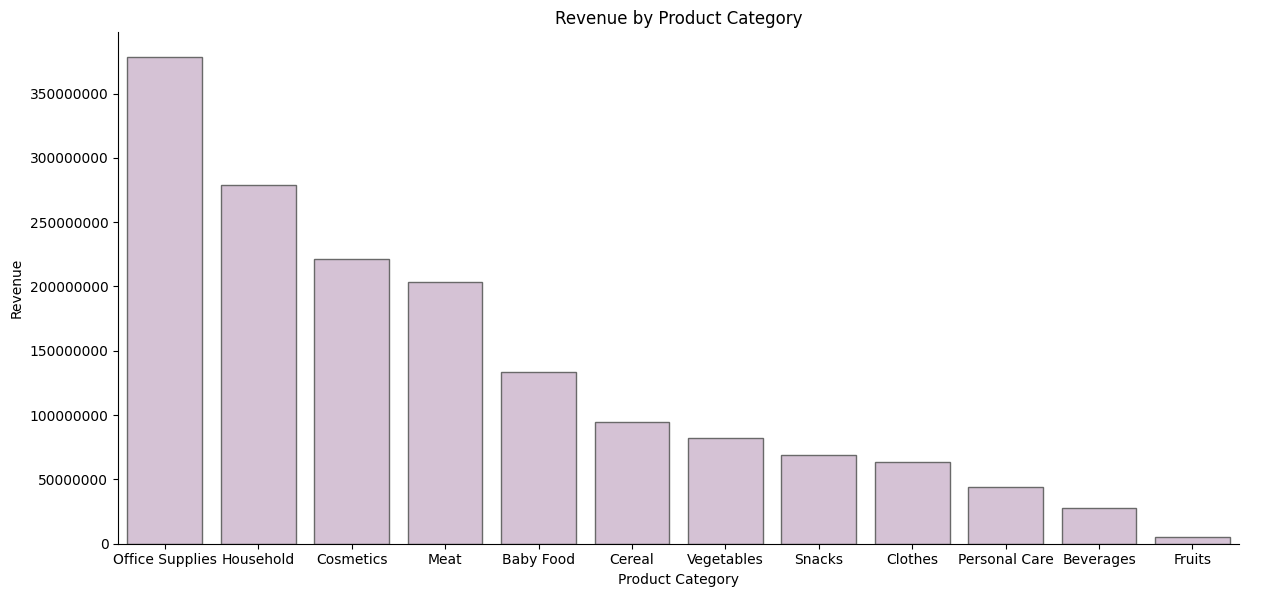

In [73]:
order_revenue = output.groupby('item_type')['revenue'].sum().sort_values(ascending=False).index

sns.catplot(data = output, x='item_type', y='revenue', height = 6, aspect = 2, kind='bar', color = 'thistle', edgecolor = 'dimgrey', errorbar = None, order = order_revenue, estimator = 'sum')
plt.title('Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

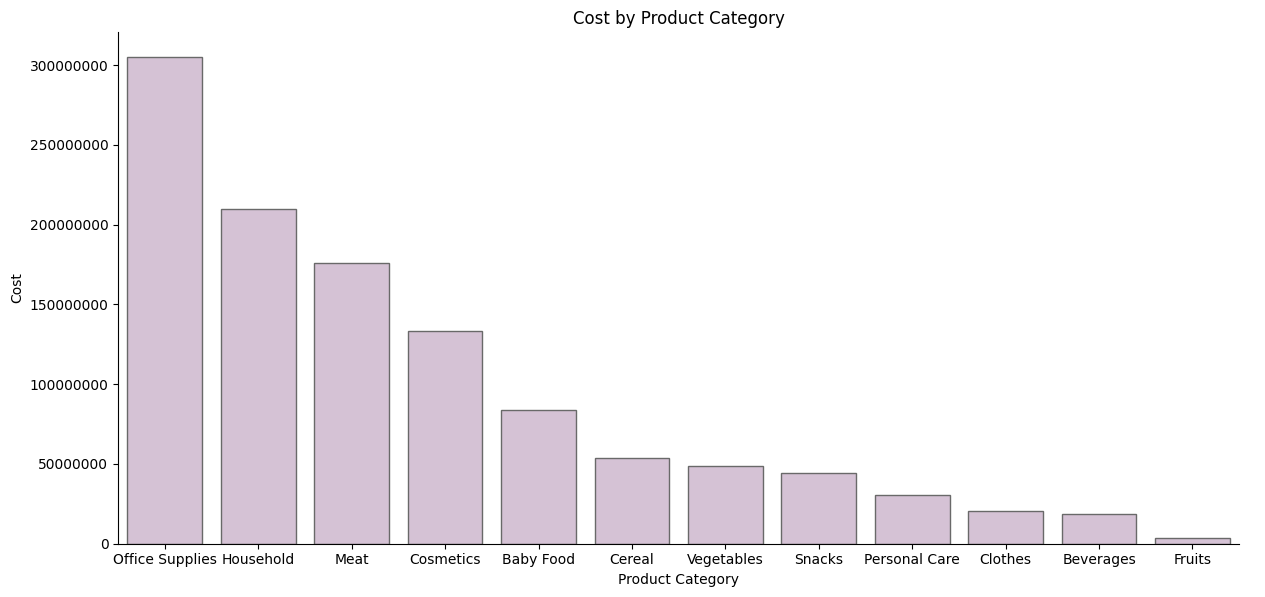

In [74]:
order_cost = output.groupby('item_type')['cost'].sum().sort_values(ascending=False).index

sns.catplot(data = output, x='item_type', y='cost', height = 6, aspect = 2, kind='bar', color = 'thistle', edgecolor = 'dimgrey',
            errorbar = None, order = order_cost, estimator = 'sum')
plt.title('Cost by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Cost')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

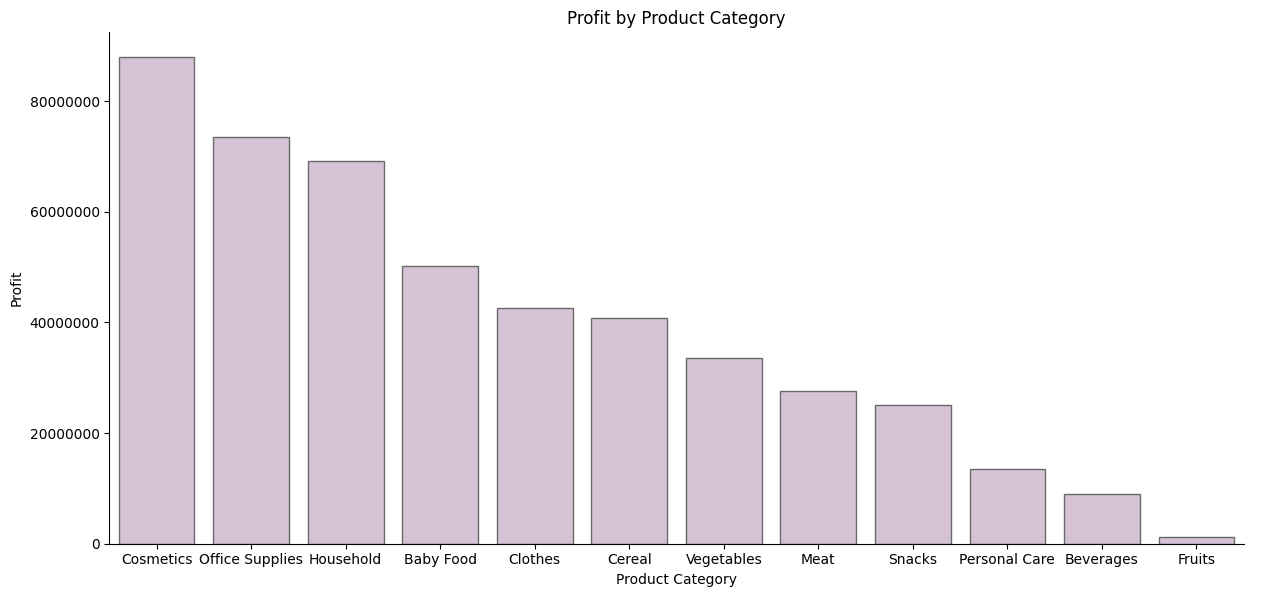

In [75]:
order_profit = output.groupby('item_type')['profit'].sum().sort_values(ascending=False).index

sns.catplot(data = output, x='item_type', y='profit', height = 6, aspect = 2, kind='bar', color = 'thistle', edgecolor = 'dimgrey',
            errorbar = None, order = order_profit, estimator = 'sum')
plt.title('Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Profit')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

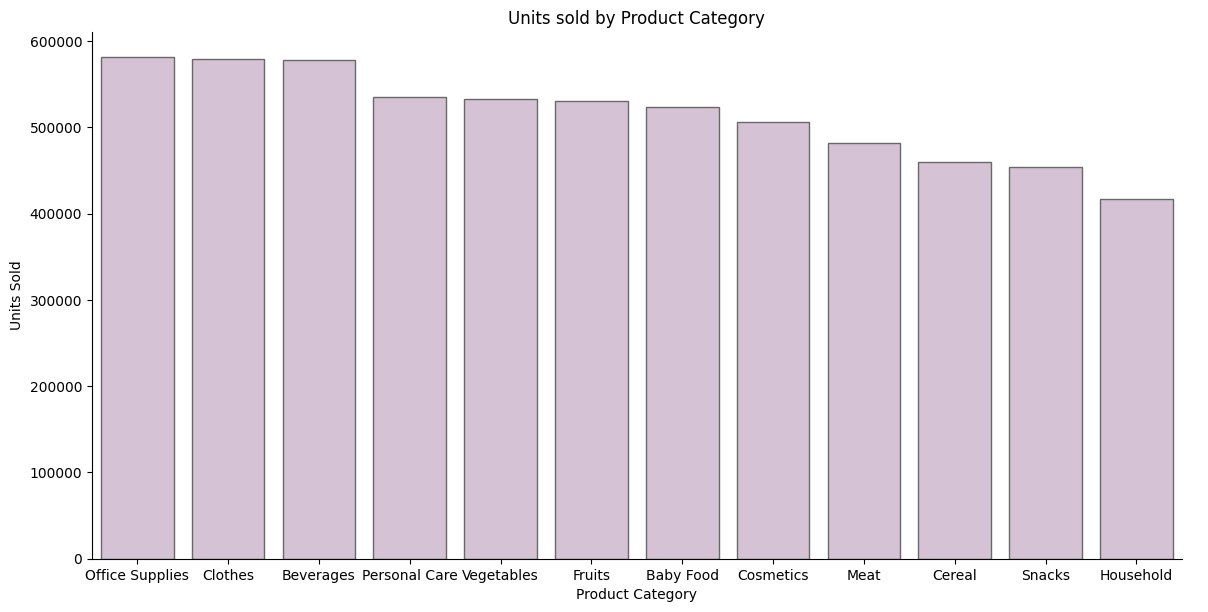

In [76]:
order_units = output.groupby('item_type')['units_sold'].sum().sort_values(ascending=False).index

sns.catplot(data = output, x='item_type', y='units_sold', height = 6, aspect = 2, kind='bar', color = 'thistle', edgecolor = 'dimgrey',
            errorbar = None, order = order_units, estimator = 'sum')
plt.title('Units sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Units Sold')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Далі перейдемо до аналізу країн і виведемо топ 15 країн за продажами і розбивку за sub_region.

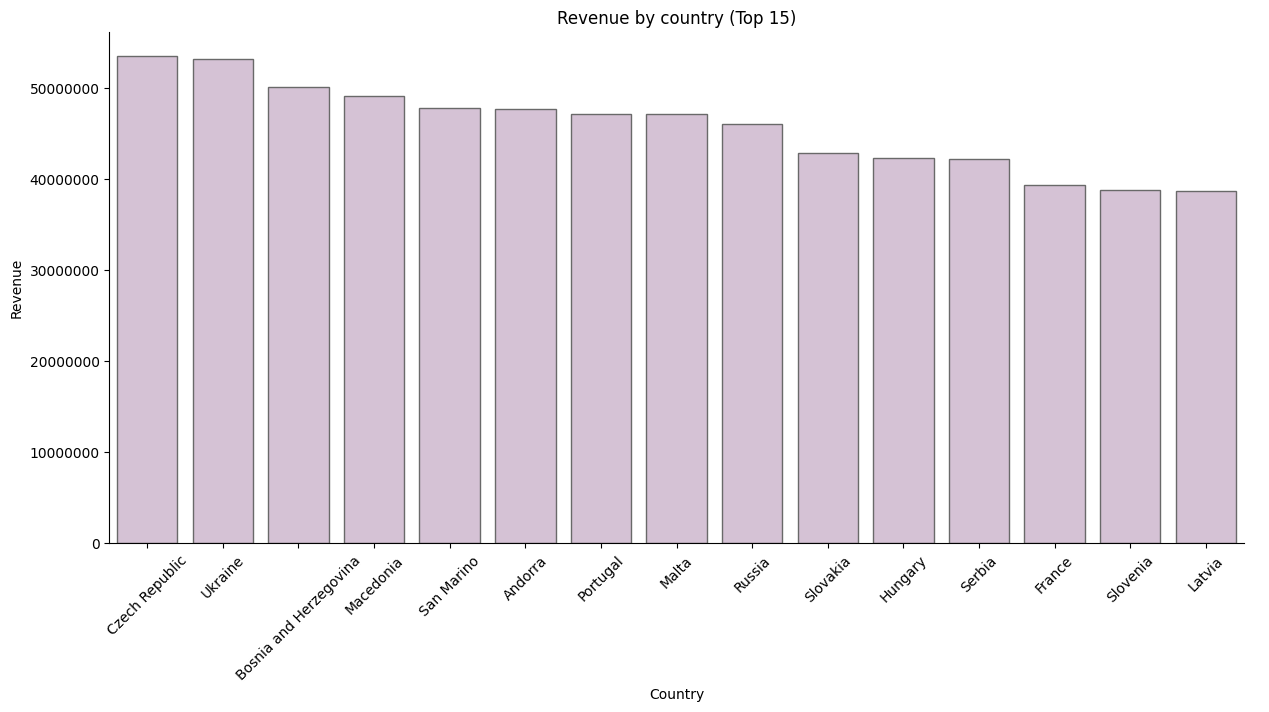

In [77]:
order_countries = output.groupby('country_name')['revenue'].sum().sort_values(ascending=False).head(15).index

sns.catplot(data = output, x='country_name', y='revenue', height = 6, aspect = 2, kind='bar', color = 'thistle', edgecolor = 'dimgrey',
            errorbar = None, order = order_countries, estimator = 'sum')
plt.title('Revenue by country (Top 15)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Revenue')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

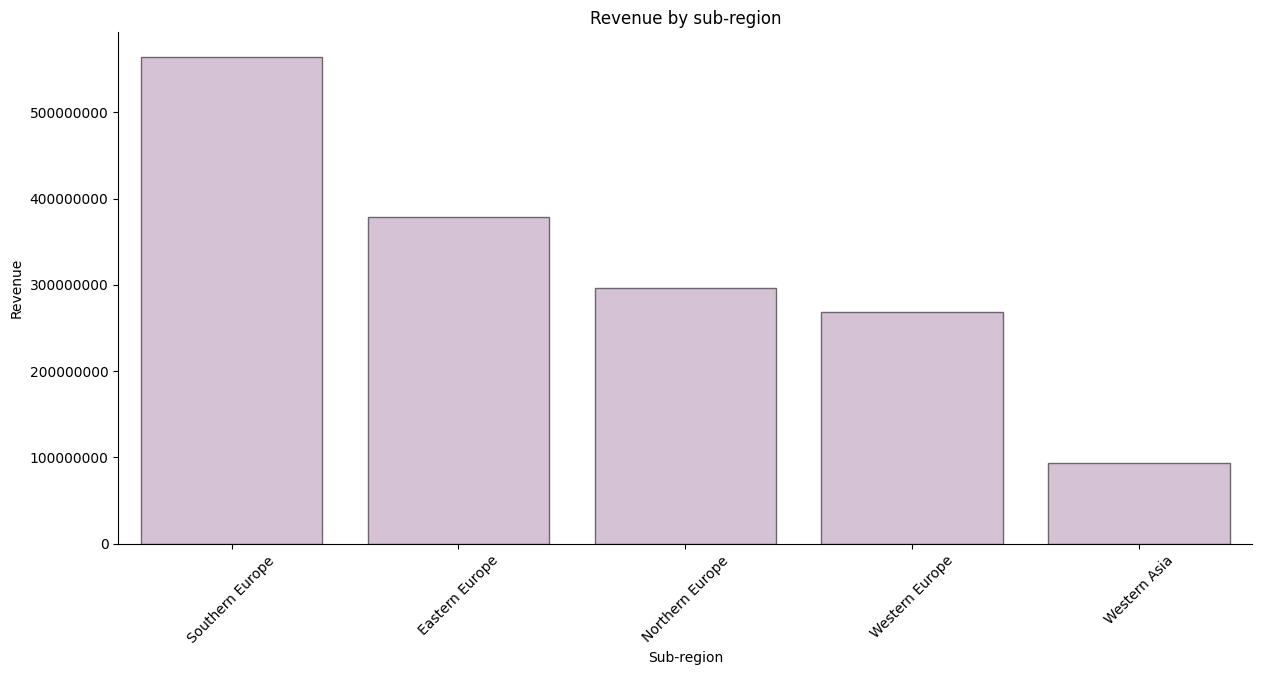

In [78]:
order_regions = output.groupby('sub_region')['revenue'].sum().sort_values(ascending=False).index

sns.catplot(data = output, x='sub_region', y='revenue', height = 6, aspect = 2, kind='bar', color = 'thistle', edgecolor = 'dimgrey',
            errorbar = None, order = order_regions, estimator = 'sum')
plt.title('Revenue by sub-region')
plt.xlabel('Sub-region')
plt.xticks(rotation=45)
plt.ylabel('Revenue')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

І також виведемо візуалізацію по продажах в залежності від каналу.

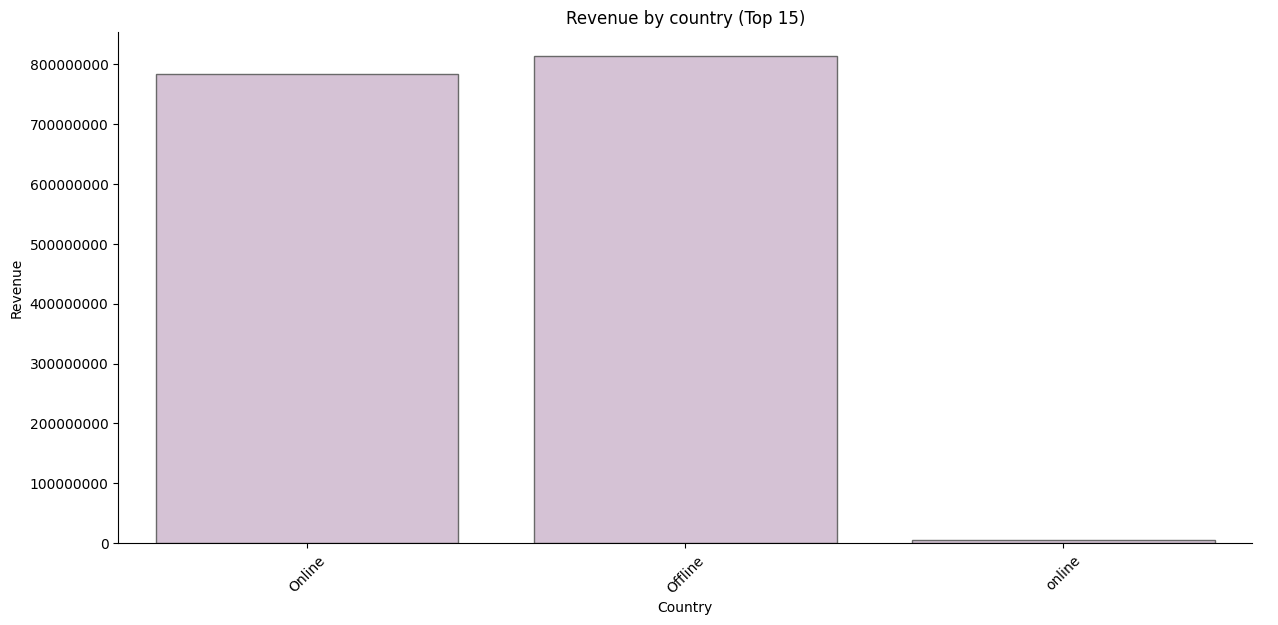

In [79]:
sns.catplot(data = output, x = 'sales_channel', y = 'revenue', height = 6, aspect = 2, kind='bar', color = 'thistle', edgecolor = 'dimgrey',
            errorbar = None, estimator = 'sum')
plt.title('Revenue by country (Top 15)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Revenue')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

По нашій візуалізації можемо побачити, що деякі значення в sales_channel починаються з маленької літери, виправимо це.

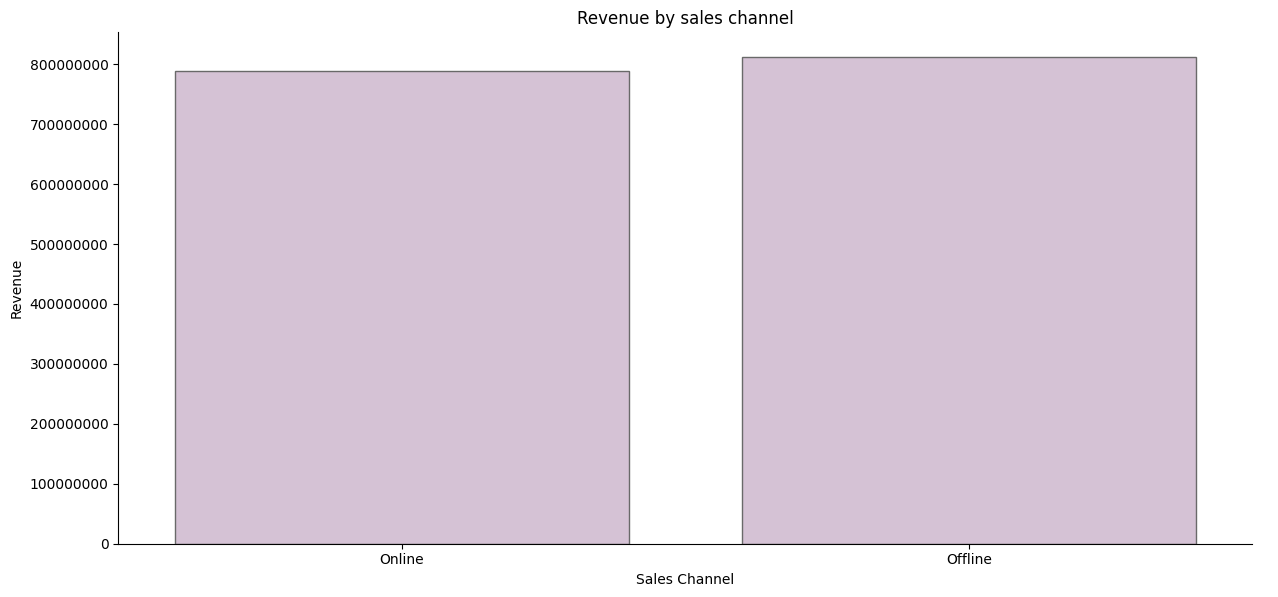

In [80]:
output['sales_channel'] = output['sales_channel'].str.title()
sns.catplot(data = output, x = 'sales_channel', y=  'revenue', height = 6, aspect = 2, kind='bar', color = 'thistle', edgecolor = 'dimgrey',
            errorbar = None, estimator = 'sum')
plt.title('Revenue by sales channel')
plt.xlabel('Sales Channel')
plt.ylabel('Revenue')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Тепер перейдемо до аналізу впливу часу, що необхідний для обробки замовлення на прибутки.

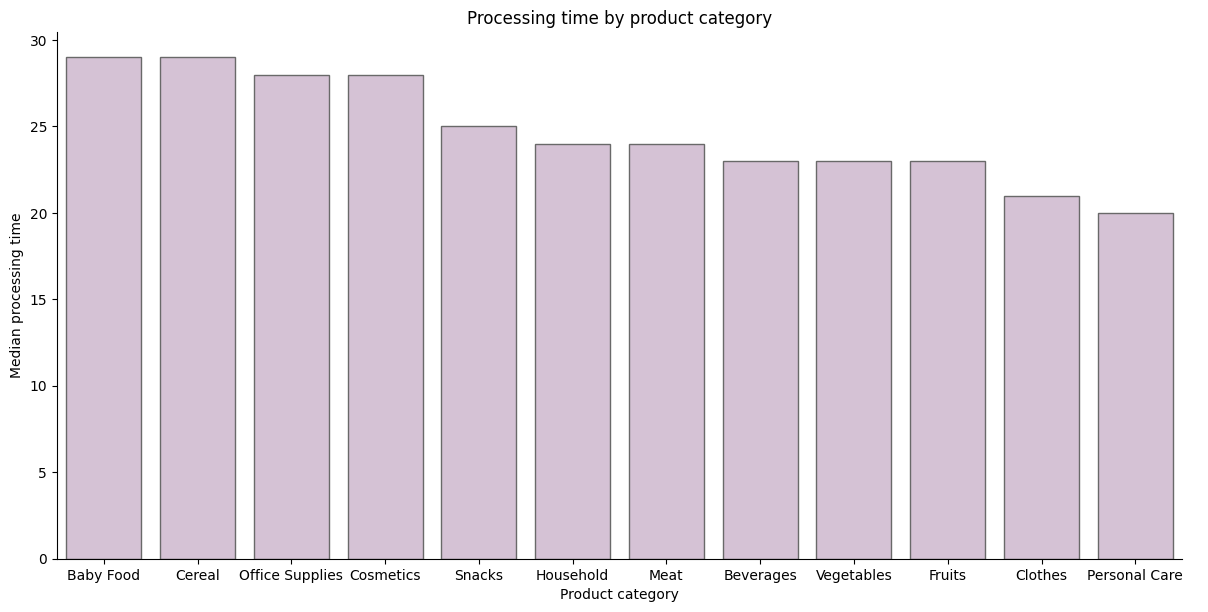

In [81]:
output['processing_time_days'] = (output['ship_date'] - output['order_date']).dt.days
order_product_processing = output.groupby('item_type')['processing_time_days'].median().sort_values(ascending=False).index

sns.catplot(data = output, x = 'item_type', y = 'processing_time_days', height = 6, aspect = 2, kind='bar', color = 'thistle', edgecolor = 'dimgrey',
            errorbar = None, estimator = 'median', order = order_product_processing)
plt.title('Processing time by product category')
plt.xlabel('Product category')
plt.ylabel('Median processing time')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

За країнами, тут також проаналізуємо топ-15 за продажами. За регіонами, візьмемо всі sub-regions для аналізу.

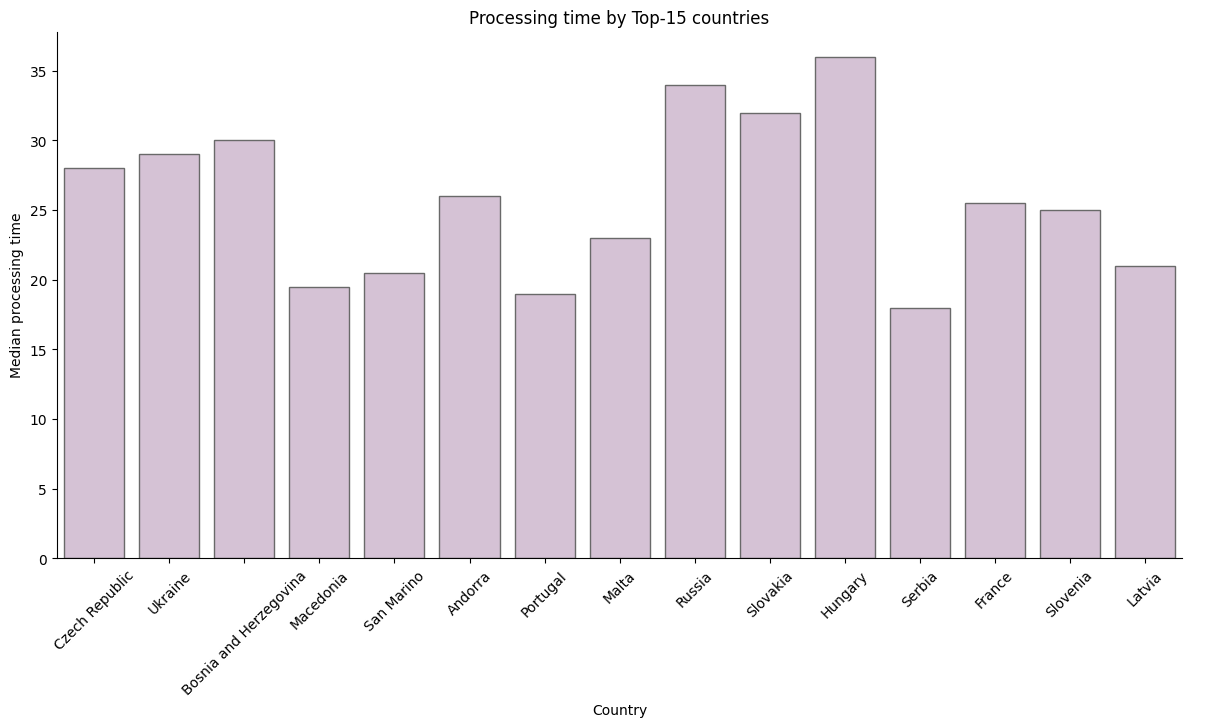

In [82]:
sns.catplot(data = output, x = 'country_name', y = 'processing_time_days', height = 6, aspect = 2, kind='bar', color = 'thistle', edgecolor = 'dimgrey',
            errorbar = None, estimator = 'median', order = order_countries)
plt.title('Processing time by Top-15 countries')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Median processing time')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

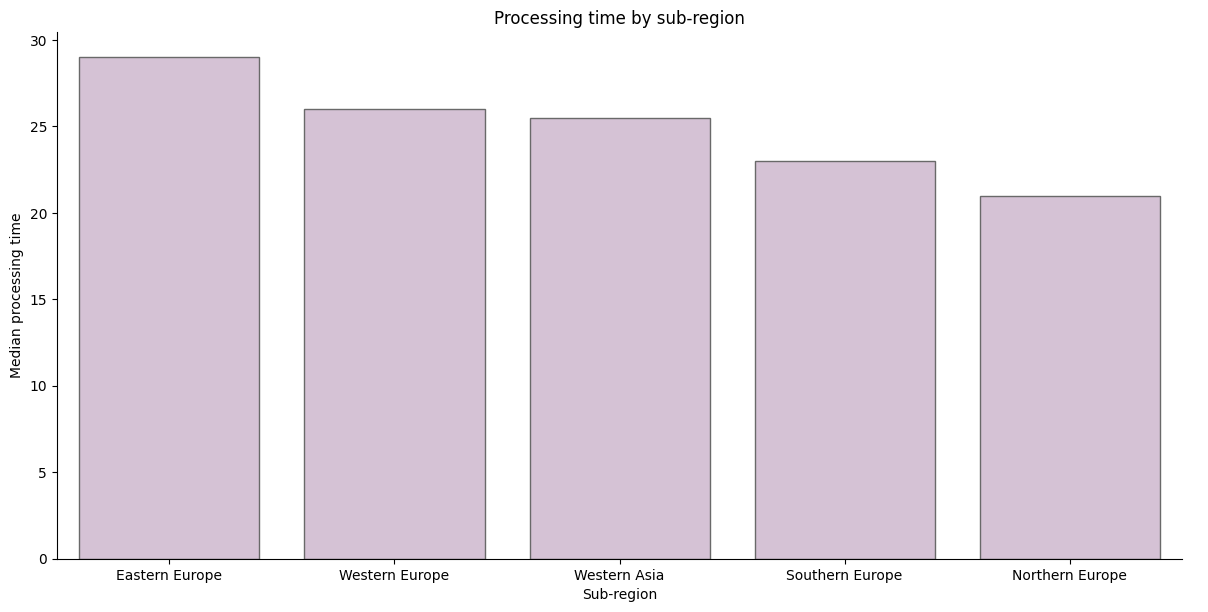

In [83]:
order_region_processing= output.groupby('sub_region')['processing_time_days'].median().sort_values(ascending=False).index

sns.catplot(data = output, x = 'sub_region', y = 'processing_time_days', height = 6, aspect = 2, kind='bar', color = 'thistle', edgecolor = 'dimgrey',
            errorbar = None, estimator = 'median', order = order_region_processing)
plt.title('Processing time by sub-region')
plt.xlabel('Sub-region')
plt.ylabel('Median processing time')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Тепер проаналізуємо, чи залежить прибуток від часу, який необхідний на обробку замовлення.

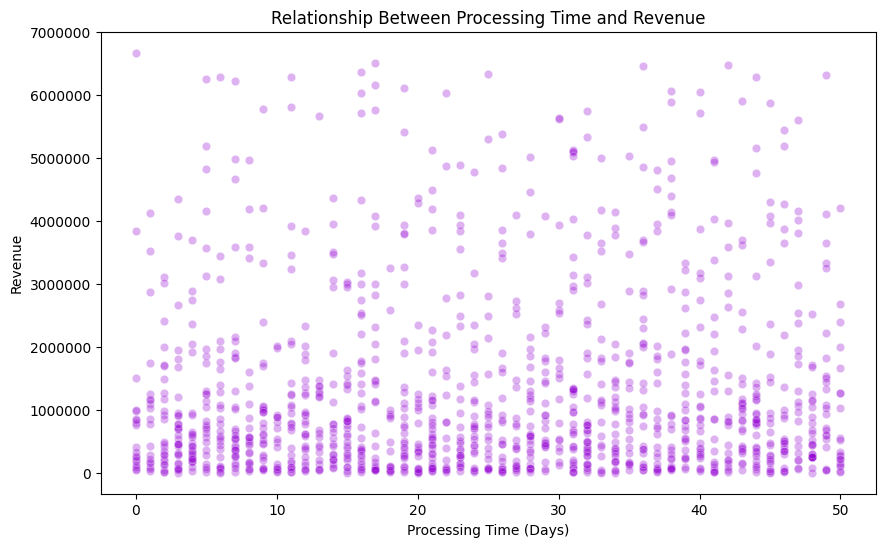

In [84]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=output, x = 'processing_time_days', y='revenue', color = 'darkviolet', alpha = 0.3)
plt.title('Relationship Between Processing Time and Revenue')
plt.xlabel('Processing Time (Days)')
plt.ylabel('Revenue')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Загалом можемо інтерпретувати цей скаттер наступним чином:
1.   Немає сильної залежності між часом на обробку замовлення і продажами;
2.   Більшість замовлень для нашого бізнесу є замовленнями маленького розміру, оскільки відбувається кластеризація в нижній частині графіку де прибуток найнижчий.

Перейдемо до аналізу прибутків у часі за категоріями, країнами та регіонами. Для початку, згрупуємо дані за місяцями для більш зрозумілих графіків.

In [85]:
output['month'] = output['order_date'].dt.to_period('M')
revenue_by_month_category = output.groupby(['month', 'item_type'])['revenue'].sum().reset_index()
revenue_by_month_category['month'] = revenue_by_month_category['month'].dt.to_timestamp()

Першим графіком виведемо продажі в часі за категоріями.

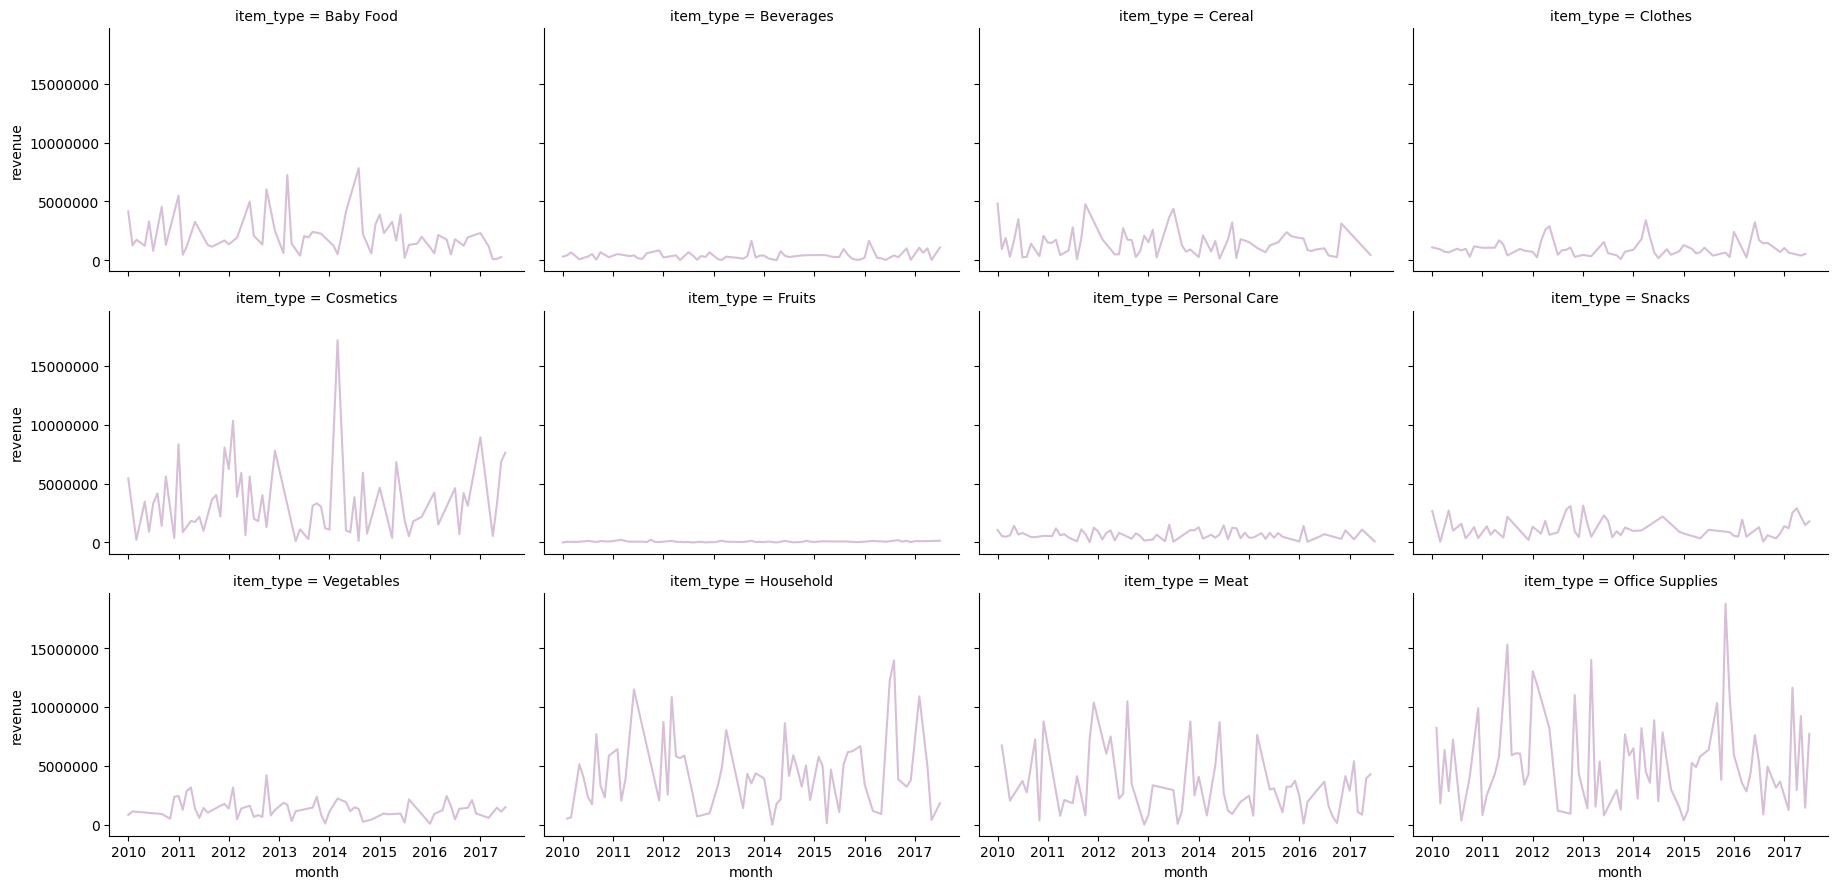

In [86]:
sns.relplot(data = revenue_by_month_category, x = 'month', y = 'revenue', col = 'item_type', height = 3, aspect = 1.5, kind='line', color = 'thistle',
            errorbar = None, estimator = 'sum', col_wrap = 4)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [87]:
revenue_by_month_country = output[output['country_name'].isin(order_countries)].copy()
revenue_by_month_country['month'] = revenue_by_month_country['order_date'].dt.to_period('M').dt.to_timestamp()
country_revenue = revenue_by_month_country.groupby(['month', 'country_name'])['revenue'].sum().reset_index()

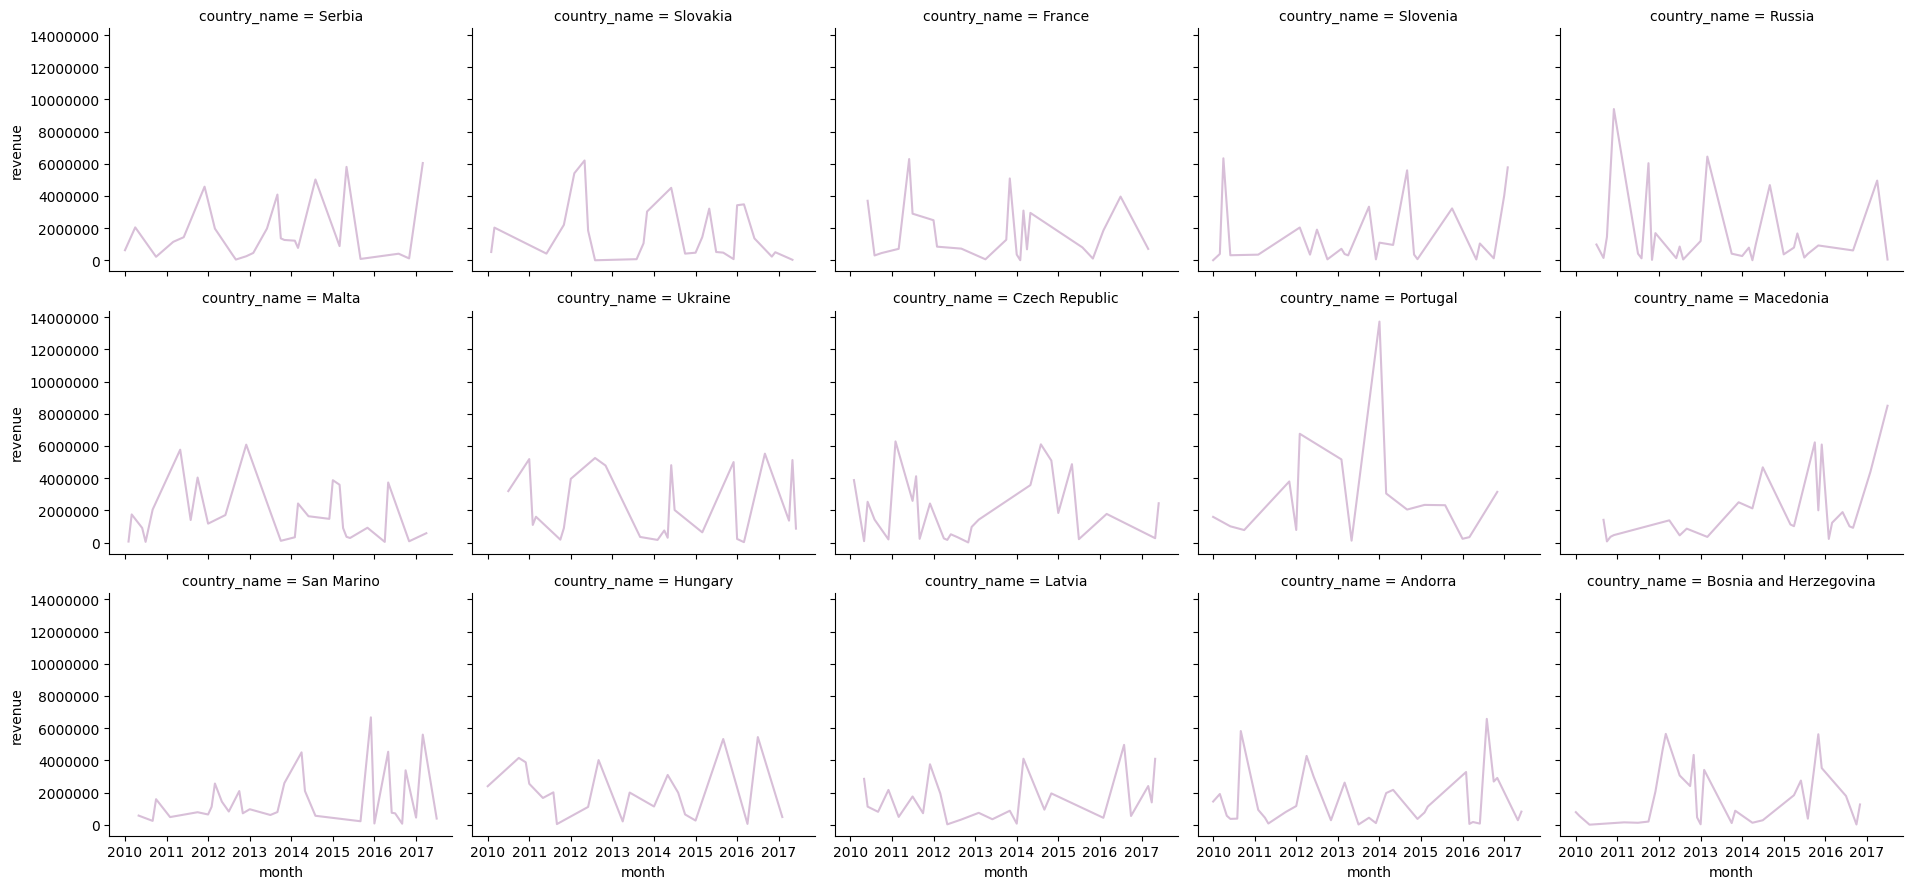

In [88]:
sns.relplot(data = revenue_by_month_country, x = 'month', y = 'revenue', col = 'country_name', height = 3, aspect = 1.25, kind='line', color = 'thistle',
            errorbar = None, estimator = 'sum', col_wrap = 5)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Далі виведемо продажі в часу за sub-region.

In [89]:
revenue_by_month_sub_region = output.groupby(['month', 'sub_region'])['revenue'].sum().reset_index()
revenue_by_month_sub_region['month'] = revenue_by_month_sub_region['month'].dt.to_timestamp()

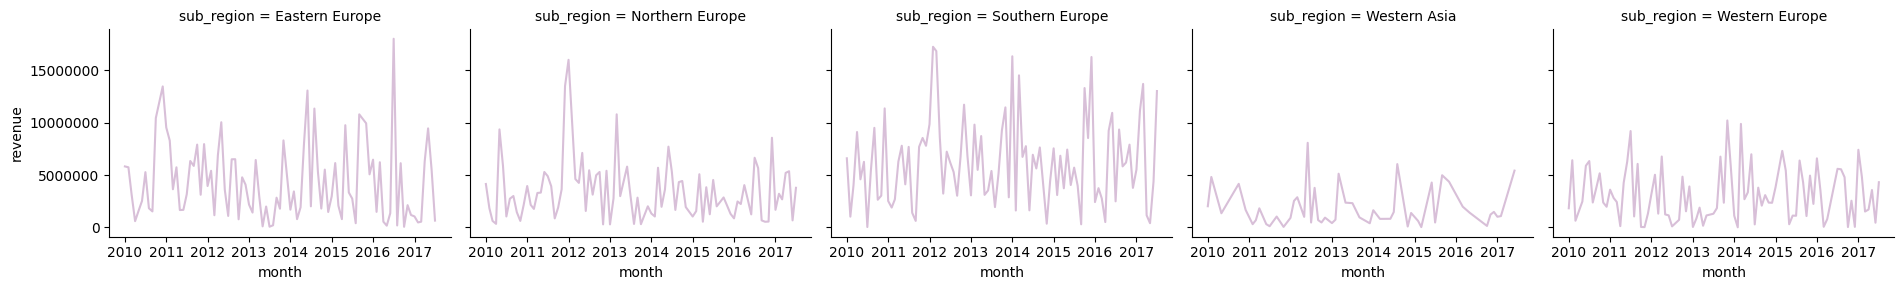

In [90]:
sns.relplot(data = revenue_by_month_sub_region, x = 'month', y = 'revenue', col = 'sub_region', height = 3, aspect = 1.25, kind='line', color = 'thistle',
            errorbar = None, estimator = 'sum')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Проаналізуємо тенденції в наших графіках, розпочавши з **категорій**:

1. Загалом на графіку одразу виділяються наші найбільш прибуткові категорії(Office Supplies, Household, Cosmetics), оскільки у них найбільші пікові продажі;
2. Прослідковується, що категорія Fruits є надзвичайно низькоприбутковою, також Beverages, Personal Care, Snacks і Vegetables мають низькі пікові продажі.

Переходимо до **країн**:
1. По всіх країнах продажі є достатньо нестабільними, особливо аномальною є Португалія з найвищими піковими продажами серед усіх топ-15 країн;
2. Є різка дуже позитивна тенденція до обʼємів продажів в Сербії, Словенії та Македонії.

І стосовно **суб-регіонів**:
1. Як і для країн, у нас прослідковуються дуже нестабільні продажі по всіх європейських регіонах;
2. З цікавого, є позитивна тенденція у продажах в Азію, хоча вона є нашим найменш прибутковим регіоном.

На завершення, проаналізуємо продажі за категоріями за днями тижня.

In [91]:
output ['weekday'] = output['order_date'].dt.day_name()
revenue_by_weekday_category = output.groupby(['weekday', 'item_type'])['revenue'].sum().reset_index()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
revenue_by_weekday_category['weekday'] = pd.Categorical(
    revenue_by_weekday_category['weekday'],
    categories=days,
    ordered=True
)

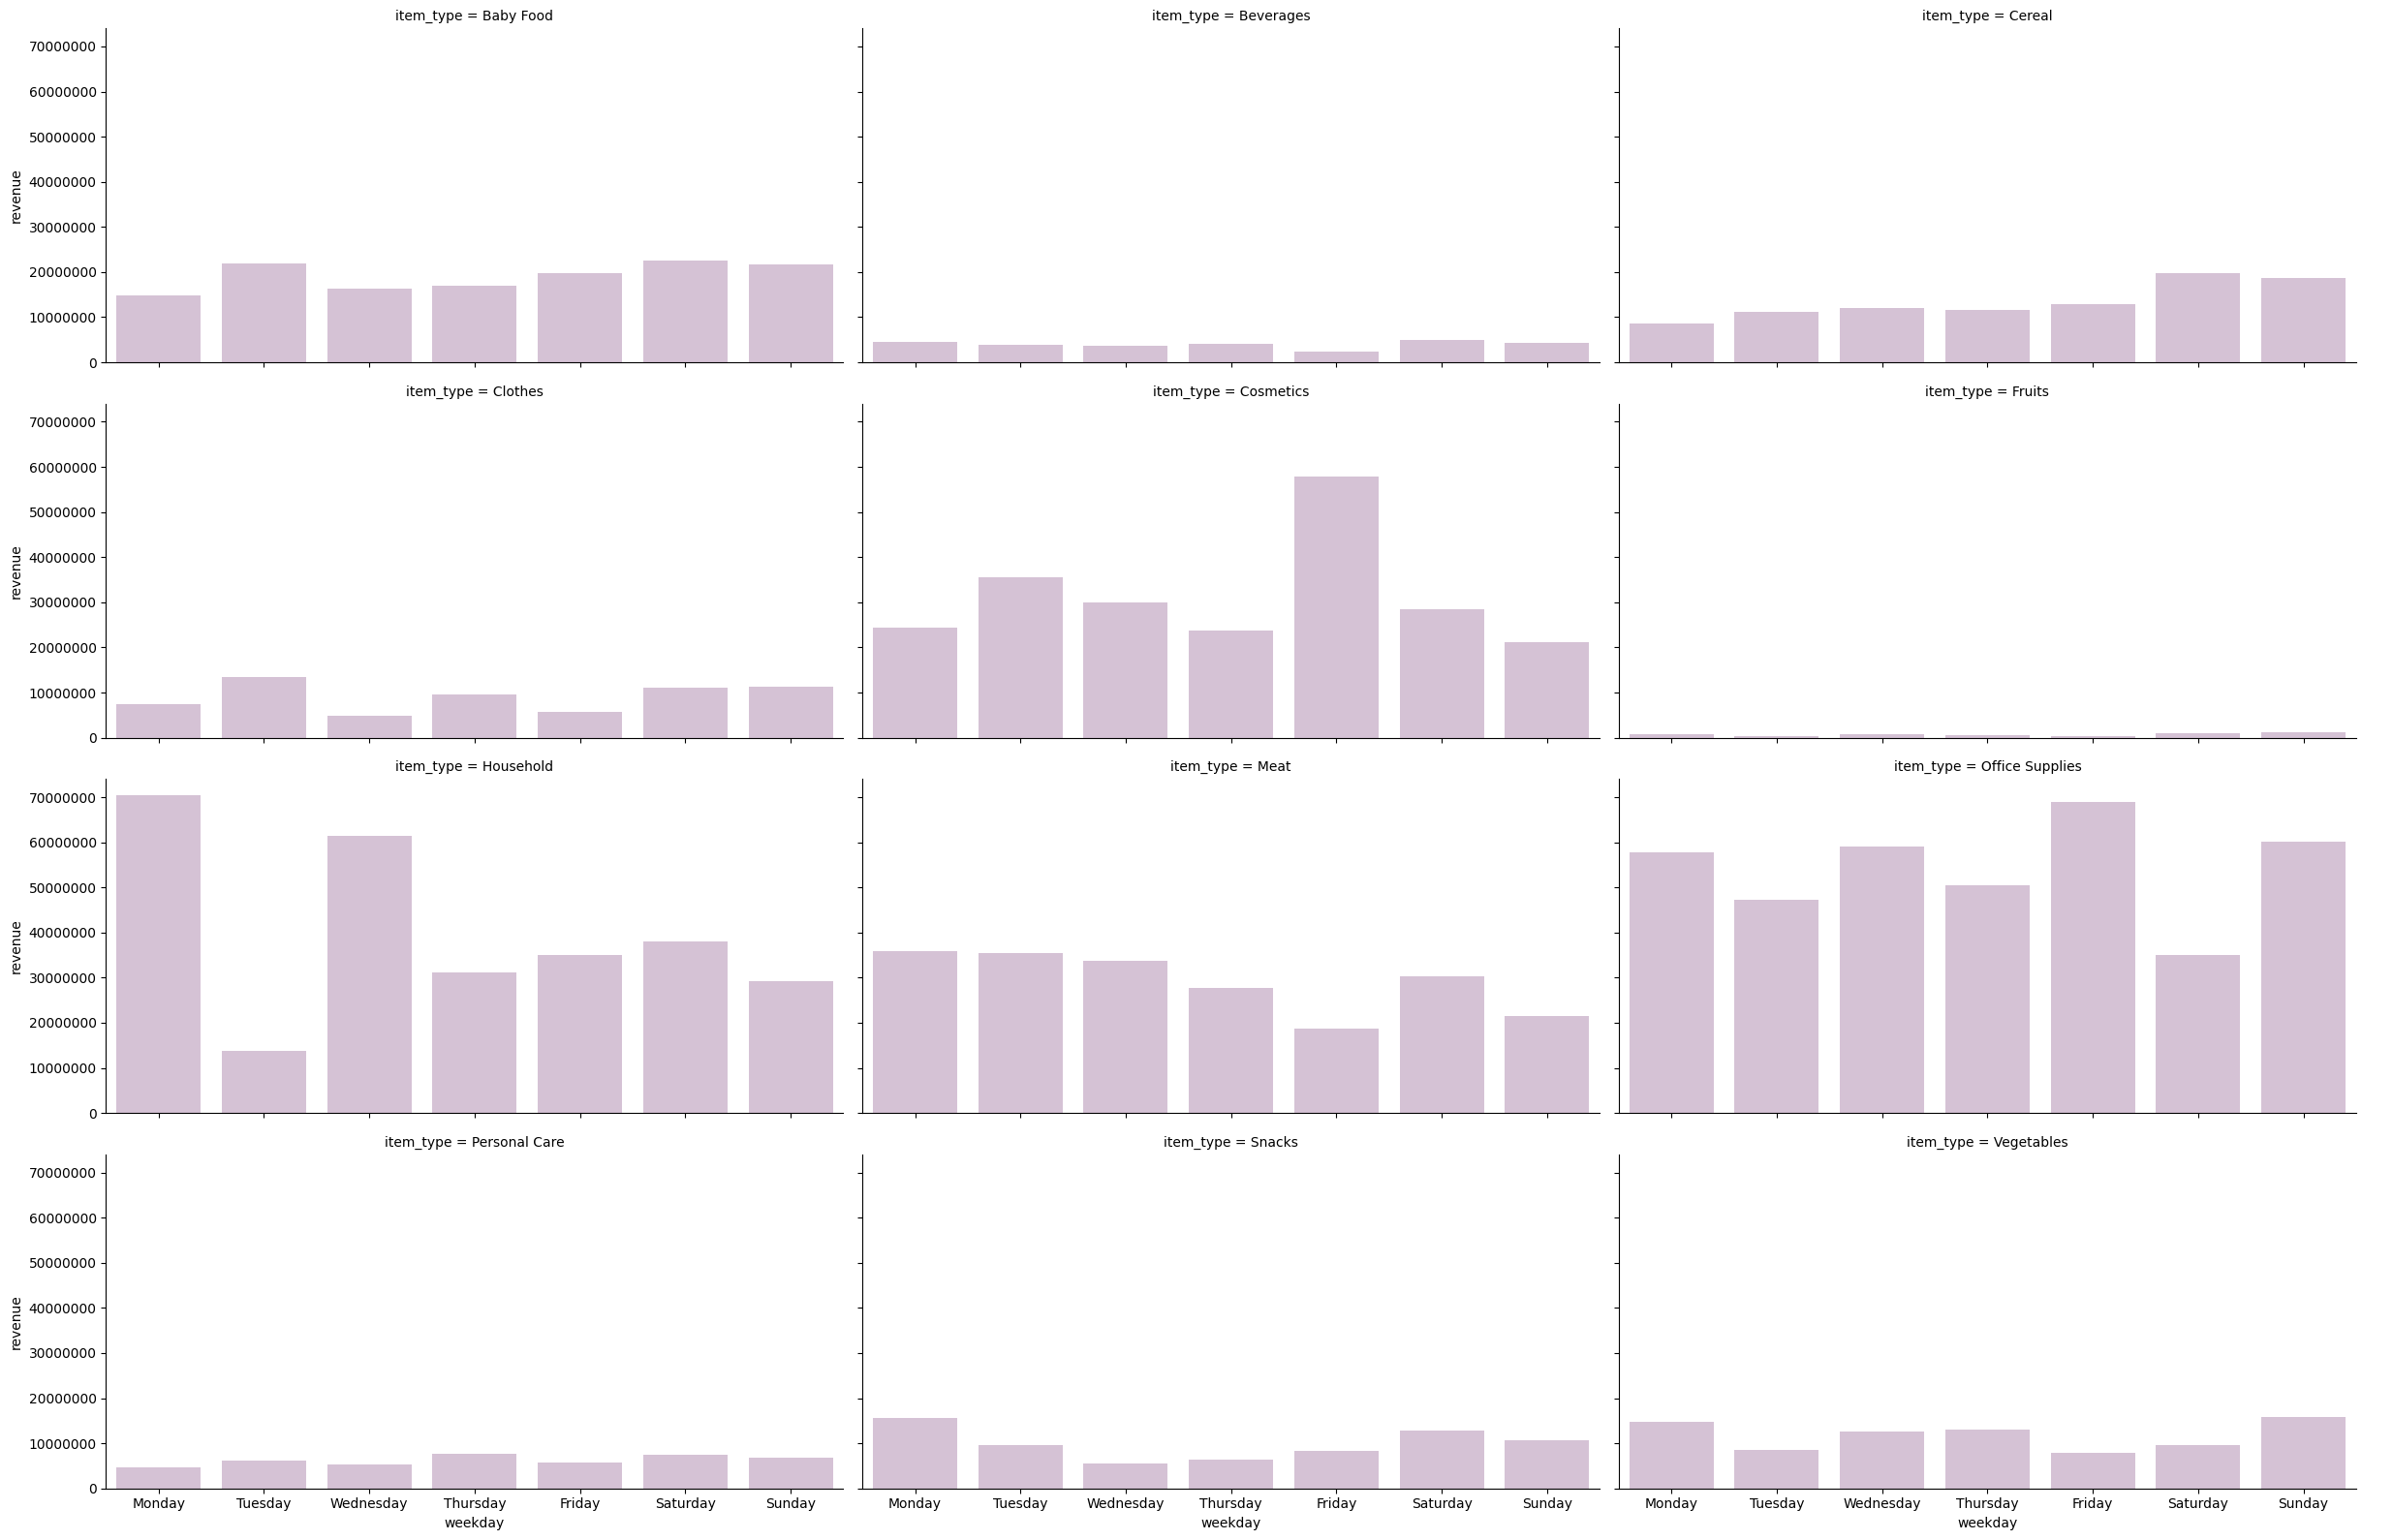

In [92]:
sns.catplot(data = revenue_by_weekday_category, x = 'weekday', y = 'revenue', col = 'item_type', height = 4, aspect = 2, kind='bar', color = 'thistle',
            errorbar = None, estimator = 'sum', col_wrap = 3)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Сезонність по днях тижня серед усіх типів товарів прослідковується переважно у категорії Cosmetics, де продажі в пʼятницю перевищують продажі в інші дні в 2 або більше разів. Також категорію Office Supplies мало купують в суботу, а Household має достатньо сильну сезонність оскільки продажі у вівторок надзвичайно малі порівняно з іншими днями тижня.

#Conclusions

##Основні показники компанії
###(2010-2017, деякі замовлення було видалено через неповні дані)

* Кількість замовлень: 1248
* Кількість охоплених країн: 45
* Загальні продажі: 1.6 млрд. дол.
* Загальні витрати: 1.1 млрд. дол.
* Загальні прибутки: 474 млн. дол.

##Огляд категорій за прибутковістю
Найбільшою за продажами є категорія *Office Supplies*, вона ж є найбільшою за витратами, а перше місце за прибутком займає категорія *Cosmetics*.

Загалом топ-3 категорії товарів (*Office Supplies*, *Cosmetics*, *Household*) за кількістю продажів також є найбільш прибутковими. Окремо хотілося б виділити, що категорія *Meat* має високий рівень продажів, при цьому низьку прибутковістю за рахунок великих витрат.

Такоє категорія *Fruits* є надзвичайно низькоприбутковою, хоча і складає значну частку проданих товарів компанії. Загалом рекомендацією тут було б розглянути шляхи оптимізації ціноутворення для цієї категорії щоб збільшити маржинальність.

##Огляд каналів продажу за прибутковістю
У компанії є здоровий розподіл між онлайн та офлайн продажами, з невеличким перевісом у бік офлайн продажів.

##Огляд впливу часу обробки замовлення на інші метрики
З нашого аналізу, ми побачили що немає сильної залежності між часом обробки замовлення і прибутковістю цих замовлень.

Не дивлячись на це, час обробки замовлень є дуже високим, особливо в одному із наших найпріоритетніших регіонів Eastern Europe.

##Огляд тенденцій продажів у часі
За категоріями:
1. Загалом одразу виділяються наші найбільш прибуткові категорії(Office Supplies, Household, Cosmetics), оскільки у них найбільші пікові продажі;
2. Прослідковується, що категорія Fruits є надзвичайно низькоприбутковою, також Beverages, Personal Care, Snacks і Vegetables мають низькі пікові продажі.

За країнами:
1. По всіх країнах продажі є достатньо нестабільними, особливо аномальною є Португалія з найвищими піковими продажами серед усіх топ-15 країн;
2. Є різка дуже позитивна тенденція до обʼємів продажів в Сербії, Словенії та Македонії.

За регіонами:
1. Як і для країн, у нас прослідковуються дуже нестабільні продажі по всіх європейських регіонах;
2. З цікавого, є позитивна тенденція у продажах в Азію, хоча вона є нашим найменш прибутковим регіоном.

##Огляд тенденцій продажів за днями тижня
Для деяких категорій товарів присутня сильна сезонність що залежить від дня тижня, як наприклад:
1. Категорія Cosmetics має x2 продажі в пʼятницю
2. Категорія Office Supplies має дуже низькі продажі в суботу
3. Категорія Household має дуже низькі продажі у вівторок

##Рекомендації на основі аналізу
1. Провести роботу щодо збільшення маржинальності категорії Fruits (збільшення цін, пошук інших постачальників тощо), або прибрати її з асортименту товарів;
2. Оптимізувати логістику з метою зменшення часу обробки та відвантаження замовлень;
3. Розглянути можливості експансії на нові ринки, особливо продовжувати експансію на ринки Азії.